1. Data preparation

In [212]:
import pandas as pd

df = pd.read_csv("pm10_data.csv")

# Parse datetime
df["datum_zajema"] = pd.to_datetime(df["datum_zajema"])

# Set datetime as index
df = df.set_index("datum_zajema").sort_index()
df = df.reset_index()

df.head()
df


,datum_zajema,vrednost,mesto
0,2023-01-01 01:00:00,33.3,Solkan
1,2023-01-01 01:00:00,8.4,CE Ljubljanska
2,2023-01-01 01:00:00,11.3,Hrastnik
3,2023-01-01 01:00:00,12.4,MS Rakičan
4,2023-01-01 01:00:00,15.1,Zagorje
...,...,...,...
1021925,2024-04-23 00:00:00,2.7,Solkan
1021926,2024-04-23 00:00:00,5.0,Trbovlje
1021927,2024-04-23 00:00:00,11.5,MS Rakičan
1021928,2024-04-23 00:00:00,16.5,CE Ljubljanska


In [213]:
df['mesto'].unique()

array(['Solkan', 'CE Ljubljanska', 'Hrastnik', 'MS Rakičan', 'Zagorje',
       'Ptuj', 'Koper', 'NG Grčna', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
       'MB Titova', 'MS Cankarjeva', 'LJ Celovška', 'Trbovlje'],
      dtype=object)

In [214]:
import pandas as pd

dff = pd.read_csv("murska-sobota-podatki")

## Parse datetime
#dff["datum_zajema"] = pd.to_datetime(df["datum_zajema"])

# Set datetime as index
#dff = dff.set_index("datum_zajema").sort_index()
dff = dff.reset_index()

dff.head()
dff


,index,station id,station name,valid,povp. T [°C],količina padavin [mm],hitrost vetra [m/s]
0,0,_1842,Murska Sobota,2023-01-01 00:00,6.9,0.0,1.5
1,1,_1842,Murska Sobota,2023-01-01 00:10,8.1,NaN,1.6
2,2,_1842,Murska Sobota,2023-01-01 00:20,9.1,NaN,2.4
3,3,_1842,Murska Sobota,2023-01-01 00:30,10.2,0.0,3.0
4,4,_1842,Murska Sobota,2023-01-01 00:40,11.1,NaN,3.2
...,...,...,...,...,...,...,...
17419,17419,_1842,Murska Sobota,2023-05-01 23:10,12.3,NaN,1.0
17420,17420,_1842,Murska Sobota,2023-05-01 23:20,12.2,NaN,0.6
17421,17421,_1842,Murska Sobota,2023-05-01 23:30,12.2,0.0,0.9
17422,17422,_1842,Murska Sobota,2023-05-01 23:40,12.1,NaN,1.2


In [215]:
cities = [
    "celje",
    "hrastnik",
    "iskrba",
    "koper",
    "maribor",
    "ptuj",
    "trbovlje",
    "zagorje",
    "lj_bezigrad",
    "murska_sobota",
    "nova_gorica",
]


In [216]:
def extract_city(col):
    for city in cities:
        suffix = "_" + city
        if col.endswith(suffix):
            return city
    return None

def extract_variable(col):
    for city in cities:
        suffix = "_" + city
        if col.endswith(suffix):
            return col[:-len(suffix)]
    return None


In [217]:
import pandas as pd
from functools import reduce

files = {
    "celje": "celje-podatki",
    "hrastnik": "hrastnik-podatki",
    "iskrba": "iskrba-podatki",
    "koper": "koper-podatki",
    "maribor": "maribor-podatki",
    "ptuj": "ptuj-podatki",
    "trbovlje": "trbovlje-podatki",
    "zagorje": "zagorje-podatki",
    "lj_bezigrad": "lj_bezigrad_podatki",
    "murska_sobota": "murska-sobota-podatki",
    "nova_gorica": "nova-gorica-podatki",
}


dfs = {}


In [218]:
for city, path in files.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    
    # Parse timestamp
    df["valid"] = pd.to_datetime(df["valid"])

    # Drop non-meteo columns
    df = df.drop(columns=["station id", "station name", "datum_zajema"], errors="ignore")

    # Rename variables with city suffix
    df = df.rename(
        columns={c: f"{c}_{city}" for c in df.columns if c != "valid"}
    )

    dfs[city] = df


In [219]:
df_merged = reduce(
    lambda left, right: pd.merge(left, right, on="valid", how="outer"),
    dfs.values()
)

df_merged = df_merged.sort_values("valid").reset_index(drop=True)


In [220]:
import pandas as pd

df_pm10 = pd.read_csv("pm10_data.csv")
df_pm10.columns = df_pm10.columns.str.strip()
# Parse datetime
df_pm10["datum_zajema"] = pd.to_datetime(df_pm10["datum_zajema"])

# Set datetime as index
df_pm10 = df_pm10.set_index("datum_zajema").sort_index()
df_pm10 = df_pm10.reset_index()

df_pm10.head()
df_pm10

,datum_zajema,vrednost,mesto
0,2023-01-01 01:00:00,33.3,Solkan
1,2023-01-01 01:00:00,8.4,CE Ljubljanska
2,2023-01-01 01:00:00,11.3,Hrastnik
3,2023-01-01 01:00:00,12.4,MS Rakičan
4,2023-01-01 01:00:00,15.1,Zagorje
...,...,...,...
1021925,2024-04-23 00:00:00,2.7,Solkan
1021926,2024-04-23 00:00:00,5.0,Trbovlje
1021927,2024-04-23 00:00:00,11.5,MS Rakičan
1021928,2024-04-23 00:00:00,16.5,CE Ljubljanska


In [221]:
wanted_vars = [
    "količina padavin [mm]",
    "hitrost vetra [m/s]",
    "povp. T [°C]"
]

cols = ["valid"] + [
    c for c in df_merged.columns
    if any(c.startswith(v) for v in wanted_vars)
]

df = df_merged[cols].copy()


In [222]:
df_long = df.melt(
    id_vars="valid",
    var_name="var_city",
    value_name="value"
)


In [223]:
df_long["mesto"] = df_long["var_city"].apply(extract_city)
df_long["variable_raw"] = df_long["var_city"].apply(extract_variable)

df_long = df_long.dropna(subset=["mesto"])


In [224]:
var_map = {
    "količina padavin [mm]": "padavine",
    "hitrost vetra [m/s]": "veter",
    "povp. T [°C]": "temperatura",
}

df_long["variable"] = df_long["variable_raw"].map(var_map)
df_long = df_long.dropna(subset=["variable"])


In [225]:
df_long = (
    df_long
    .pivot_table(
        index=["valid", "mesto"],
        columns="variable",
        values="value"
    )
    .reset_index()
)


In [226]:
df_long['mesto'].unique()

array(['celje', 'hrastnik', 'iskrba', 'koper', 'lj_bezigrad', 'maribor',
       'murska_sobota', 'nova_gorica', 'ptuj', 'trbovlje', 'zagorje'],
      dtype=object)

In [227]:
df_pm10['mesto'].unique()

array(['Solkan', 'CE Ljubljanska', 'Hrastnik', 'MS Rakičan', 'Zagorje',
       'Ptuj', 'Koper', 'NG Grčna', 'CE bolnica', 'Iskrba', 'LJ Bežigrad',
       'MB Titova', 'MS Cankarjeva', 'LJ Celovška', 'Trbovlje'],
      dtype=object)

In [228]:
# Remove unwanted stations
df_pm10 = df_pm10[~df_pm10["mesto"].isin(["Solkan", "CE Ljubljanska", "LJ Celovška"])]

# Standardize remaining city names to match df_long
df_pm10["mesto"] = df_pm10["mesto"].replace({
    "Hrastnik": "hrastnik",
    "Iskrba": "iskrba",
    "Koper": "koper",
    "LJ Bežigrad": "lj_bezigrad",
    "MB Titova": "maribor",
    "MS Cankarjeva": "murska_sobota",
    "NG Grčna": "nova_gorica",
    "Ptuj": "ptuj",
    "Trbovlje": "trbovlje",
    "Zagorje": "zagorje",
    "CE bolnica": "celje",
    "Celje": "celje"
})


C:\Users\Dell\AppData\Local\Temp\ipykernel_18788\1585698484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10["mesto"] = df_pm10["mesto"].replace({


In [229]:
print(df_long['mesto'].unique())


# Remove MS Rakičan from df_pm10
df_pm10 = df_pm10[df_pm10["mesto"] != "MS Rakičan"]

# (optional) sanity check
print(df_pm10["mesto"].unique())


['celje' 'hrastnik' 'iskrba' 'koper' 'lj_bezigrad' 'maribor'
 'murska_sobota' 'nova_gorica' 'ptuj' 'trbovlje' 'zagorje']
['hrastnik' 'zagorje' 'ptuj' 'koper' 'nova_gorica' 'celje' 'iskrba'
 'lj_bezigrad' 'maribor' 'murska_sobota' 'trbovlje']


In [230]:
import pandas as pd

# Rename columns to include units
df_long = df_long.rename(columns={
    "temperatura": "temperatura [°C]",
    "padavine": "padavine [mm]",
    "veter": "veter [m/s]",
    "valid": 'datum_zajema'
})

# Save to CSV
df_long.to_csv("temperatura_padavine_veter.csv", index=False)
df_long


variable,datum_zajema,mesto,padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 00:00:00,celje,0.0,13.2,7.2
1,2023-01-01 00:00:00,hrastnik,0.0,11.6,1.9
2,2023-01-01 00:00:00,iskrba,0.0,9.7,1.7
3,2023-01-01 00:00:00,koper,0.0,11.4,0.8
4,2023-01-01 00:00:00,lj_bezigrad,0.0,12.4,2.1
...,...,...,...,...,...
168427,2023-05-01 23:50:00,murska_sobota,NaN,12.1,1.4
168428,2023-05-01 23:50:00,nova_gorica,NaN,13.1,0.6
168429,2023-05-01 23:50:00,ptuj,NaN,12.4,0.5
168430,2023-05-01 23:50:00,trbovlje,NaN,12.8,1.1


here another solution starts


In [231]:
# Make sure both keys exist and are clean
df_pm10["datum_zajema"] = pd.to_datetime(df_pm10["datum_zajema"])
df_long["datum_zajema"] = pd.to_datetime(df_long["datum_zajema"])

df_pm10["mesto"] = df_pm10["mesto"].str.strip().str.lower()
df_long["mesto"] = df_long["mesto"].str.strip().str.lower()

# Correct merge: time + city
df_merged = pd.merge(
    df_pm10,
    df_long,
    on=["datum_zajema", "mesto"],
    how="inner"
)

# Sort & reset index
df_merged = df_merged.sort_values(["mesto", "datum_zajema"]).reset_index(drop=True)


df_merged = df_merged.rename(columns={
    "vrednost": "pm10 [µg/m³]"
})



In [232]:
df_merged = df_merged[
    ["datum_zajema", "mesto"] +
    [c for c in df_merged.columns if c not in ["datum_zajema", "mesto"]]
]




In [233]:
df_merged.head()


,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2


In [234]:
df_merged.to_csv("temperatura_padavine_veter_pm10.csv", index=False)


In [235]:
import pandas as pd
import glob
import os

# Find all files starting with "smer_vetra"
files = glob.glob("smer_vetra*.csv")

for path in files:
    df = pd.read_csv(path)
    print(path)
    # Clean column names (safety)
    df.columns = df.columns.str.strip().str.lower()

    # Drop station id
    if "station id" in df.columns:
        df = df.drop(columns=["station id"])

    # Rename columns
    df = df.rename(columns={
        "station name": "mesto",
        "valid": "datum_zajema"
    })

    # Parse datetime
    df["datum_zajema"] = pd.to_datetime(df["datum_zajema"])

    # Save back (overwrite)
    df.to_csv(path, index=False)



In [236]:
import pandas as pd

files = [
    "smer_vetra_celje",
    "smer_vetra_hrastnik",
    "smer_vetra_iskrba",
    "smer_vetra_murska_sobota",
    "smer_vetra_koper",
    "smer_vetra_lj_bezigrad",
    "smer_vetra_maribor",
    "smer_vetra_nova_gorica",
    "smer_vetra_ptuj",
    "smer_vetra_trbovlje",
    "smer_vetra_zagorje",
]

dfs = []

for path in files:
    city = path.replace("smer_vetra_", "")

    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()

    # Drop station id
    df = df.drop(columns=["station id"], errors="ignore")

    # Parse datetime
    df["valid"] = pd.to_datetime(df["valid"])

    # Rename wind direction column to include city
    df = df.rename(columns={
        "smer vetra [°]": f"smer_vetra_{city} [°]"
    })

    dfs.append(df)


In [237]:
df_merged_2 = dfs[0]

for df in dfs[1:]:
    # Keep only 'valid' + columns not in df_merged_2
    cols_to_merge = ['valid'] + [c for c in df.columns if c not in df_merged_2.columns]
    df_merged_2 = df_merged_2.merge(df[cols_to_merge], on='valid', how='outer')

df_merged_2 = df_merged_2.sort_values("valid").reset_index(drop=True)


In [238]:
df_merged_2

,station name,valid,smer_vetra_celje [°],smer_vetra_hrastnik [°],smer_vetra_iskrba [°],smer_vetra_murska_sobota [°],smer_vetra_koper [°],smer_vetra_lj_bezigrad [°],smer_vetra_maribor [°],smer_vetra_nova_gorica [°],smer_vetra_ptuj [°],smer_vetra_trbovlje [°],smer_vetra_zagorje [°]
0,Celje Medlog,2023-01-01 00:00:00,268.0,19.5,198.0,200,98.5,251.0,148.0,164.3,215.0,163.7,178.4
1,NaN,2023-01-01 00:10:00,NaN,17.2,210.0,204,124.2,246.0,202.0,152.4,209.0,133.8,171.6
2,NaN,2023-01-01 00:20:00,NaN,21.3,210.0,215,130.9,237.0,222.0,349.0,209.0,134.9,178.8
3,Celje Medlog,2023-01-01 00:30:00,263.0,29.7,221.0,215,253.9,247.0,212.0,3.6,211.0,147.1,169.8
4,NaN,2023-01-01 00:40:00,NaN,15.2,202.0,219,274.8,241.0,198.0,320.4,210.0,134.9,172.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17419,NaN,2023-05-01 23:10:00,NaN,96.5,225.0,249,123.0,46.0,303.0,120.8,246.0,141.0,164.6
17420,NaN,2023-05-01 23:20:00,NaN,160.2,261.0,297,109.9,60.0,304.0,116.7,198.0,123.8,180.7
17421,Celje Medlog,2023-05-01 23:30:00,240.0,142.4,160.0,314,14.7,94.0,294.0,99.1,181.0,137.8,281.7
17422,NaN,2023-05-01 23:40:00,NaN,287.3,64.0,310,298.7,83.0,277.0,110.3,182.0,138.4,276.1


In [239]:
df_long_2 = df_merged_2.melt(
    id_vars=["valid"],  # keep only the timestamp
    value_vars=[c for c in df_merged_2.columns if c.startswith("smer_vetra_")],  # all wind columns
    var_name="mesto",
    value_name="smer vetra [°]"
)

# Remove 'smer_vetra_' prefix and ' [°]' suffix from city names
df_long_2["mesto"] = df_long_2["mesto"].str.replace("smer_vetra_", "", regex=False).str.replace(" \[°\]", "", regex=True)

df_long_2


,valid,mesto,smer vetra [°]
0,2023-01-01 00:00:00,celje,268.0
1,2023-01-01 00:10:00,celje,NaN
2,2023-01-01 00:20:00,celje,NaN
3,2023-01-01 00:30:00,celje,263.0
4,2023-01-01 00:40:00,celje,NaN
...,...,...,...
191659,2023-05-01 23:10:00,zagorje,164.6
191660,2023-05-01 23:20:00,zagorje,180.7
191661,2023-05-01 23:30:00,zagorje,281.7
191662,2023-05-01 23:40:00,zagorje,276.1


In [240]:
df_long_2

,valid,mesto,smer vetra [°]
0,2023-01-01 00:00:00,celje,268.0
1,2023-01-01 00:10:00,celje,NaN
2,2023-01-01 00:20:00,celje,NaN
3,2023-01-01 00:30:00,celje,263.0
4,2023-01-01 00:40:00,celje,NaN
...,...,...,...
191659,2023-05-01 23:10:00,zagorje,164.6
191660,2023-05-01 23:20:00,zagorje,180.7
191661,2023-05-01 23:30:00,zagorje,281.7
191662,2023-05-01 23:40:00,zagorje,276.1


In [241]:
df_merged

,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2
...,...,...,...,...,...,...
168030,2023-05-01 23:10:00,zagorje,24.5,NaN,12.9,0.3
168031,2023-05-01 23:20:00,zagorje,27.4,NaN,13.0,0.8
168032,2023-05-01 23:30:00,zagorje,32.8,NaN,13.0,0.4
168033,2023-05-01 23:40:00,zagorje,38.2,NaN,13.0,0.6


In [242]:
df_long_2 = df_long_2.rename(columns={"valid": "datum_zajema"})
# 1️⃣ Ensure datetime columns are datetime type
df_long_2["datum_zajema"] = pd.to_datetime(df_long_2["datum_zajema"])
df_merged["datum_zajema"] = pd.to_datetime(df_merged["datum_zajema"])

# 2️⃣ Clean city names
df_long_2["mesto"] = df_long_2["mesto"].str.strip().str.lower()
df_merged["mesto"] = df_merged["mesto"].str.strip().str.lower()

# 3️⃣ Merge on exact timestamp + city
df_long_2 = pd.merge(
    df_long_2,
    df_merged[['datum_zajema', 'mesto', 'pm10 [µg/m³]', 'padavine [mm]', 'temperatura [°C]', 'veter [m/s]']],
    on=["datum_zajema", "mesto"],
    how="left"  # keep all rows from df_long_2
)

# 4️⃣ Sort & reset index
df_long_2 = df_long_2.sort_values(["mesto", "datum_zajema"]).reset_index(drop=True)

df_long_2.head()


,datum_zajema,mesto,smer vetra [°],pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 00:00:00,celje,268.0,NaN,NaN,NaN,NaN
1,2023-01-01 00:10:00,celje,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 00:20:00,celje,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 00:30:00,celje,263.0,NaN,NaN,NaN,NaN
4,2023-01-01 00:40:00,celje,NaN,NaN,NaN,NaN,NaN


In [243]:
# Make sure 'datum_zajema' is datetime
df_long_2['datum_zajema'] = pd.to_datetime(df_long_2['datum_zajema'])

# Keep only rows where minutes are 0 or 30
df_long_2 = df_long_2[df_long_2['datum_zajema'].dt.minute.isin([0, 30])]

# Optional: sort and reset index
df_long_2 = df_long_2.sort_values(['mesto', 'datum_zajema']).reset_index(drop=True)



In [244]:
df_merged

,datum_zajema,mesto,pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,6.0,0.0,11.9,3.2
...,...,...,...,...,...,...
168030,2023-05-01 23:10:00,zagorje,24.5,NaN,12.9,0.3
168031,2023-05-01 23:20:00,zagorje,27.4,NaN,13.0,0.8
168032,2023-05-01 23:30:00,zagorje,32.8,NaN,13.0,0.4
168033,2023-05-01 23:40:00,zagorje,38.2,NaN,13.0,0.6


In [245]:
df_long_2 = df_long_2.iloc[2:].reset_index(drop=True)
df_long_2




,datum_zajema,mesto,smer vetra [°],pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,256.0,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,255.0,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,251.0,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,271.0,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,264.0,6.0,0.0,11.9,3.2
...,...,...,...,...,...,...,...
63881,2023-05-01 21:30:00,zagorje,330.3,25.9,NaN,13.6,0.2
63882,2023-05-01 22:00:00,zagorje,337.1,28.4,NaN,13.4,0.2
63883,2023-05-01 22:30:00,zagorje,346.1,26.5,NaN,13.2,0.2
63884,2023-05-01 23:00:00,zagorje,165.7,23.5,NaN,12.9,0.4


In [246]:
df_long_2.head()

,datum_zajema,mesto,smer vetra [°],pm10 [µg/m³],padavine [mm],temperatura [°C],veter [m/s]
0,2023-01-01 01:00:00,celje,256.0,6.1,0.0,13.2,6.3
1,2023-01-01 01:30:00,celje,255.0,6.2,0.0,13.4,7.5
2,2023-01-01 02:00:00,celje,251.0,5.8,0.0,13.5,7.8
3,2023-01-01 02:30:00,celje,271.0,4.6,0.0,12.8,4.5
4,2023-01-01 03:00:00,celje,264.0,6.0,0.0,11.9,3.2


In [247]:
df_long_2.to_csv("pm_10_and_weather_conditions.csv", index=False)


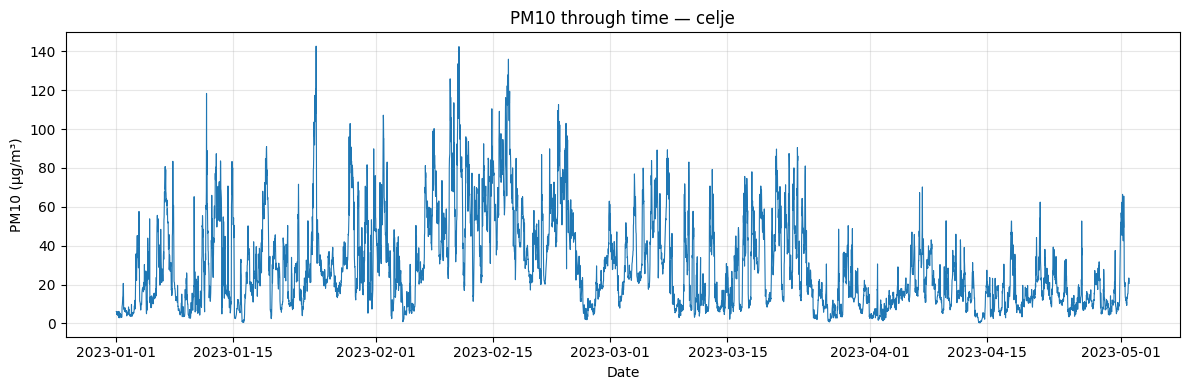

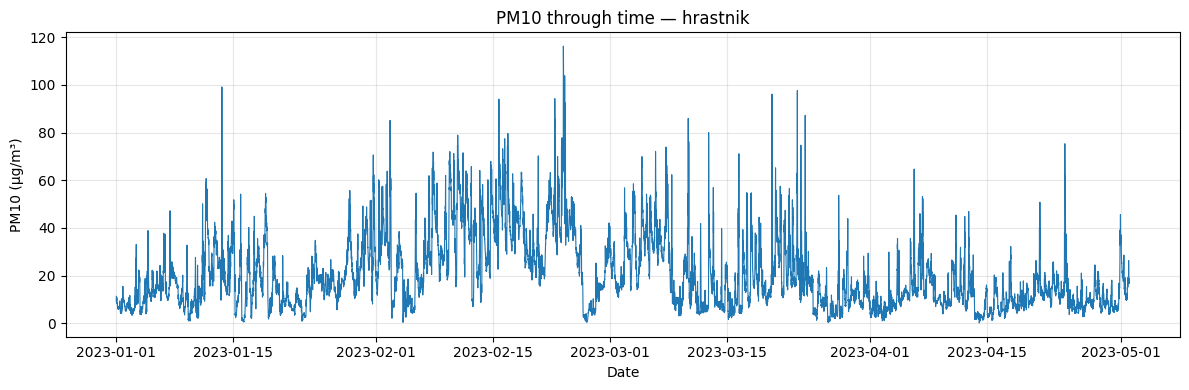

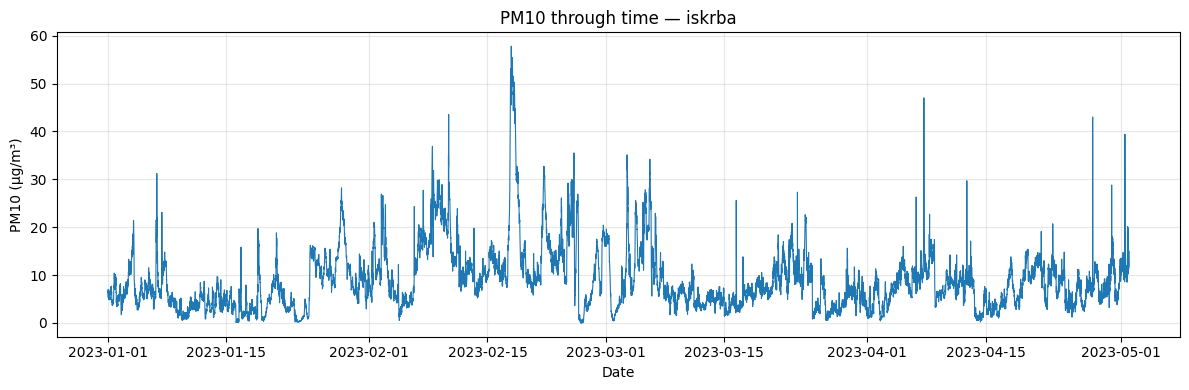

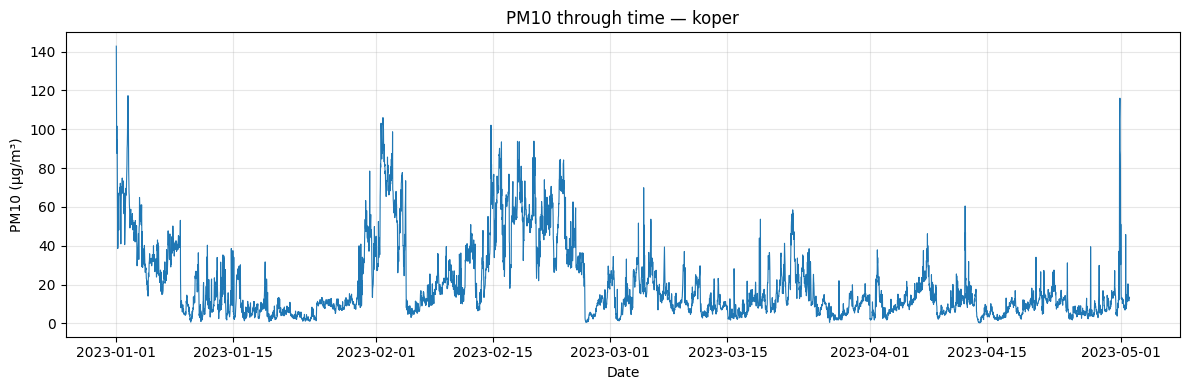

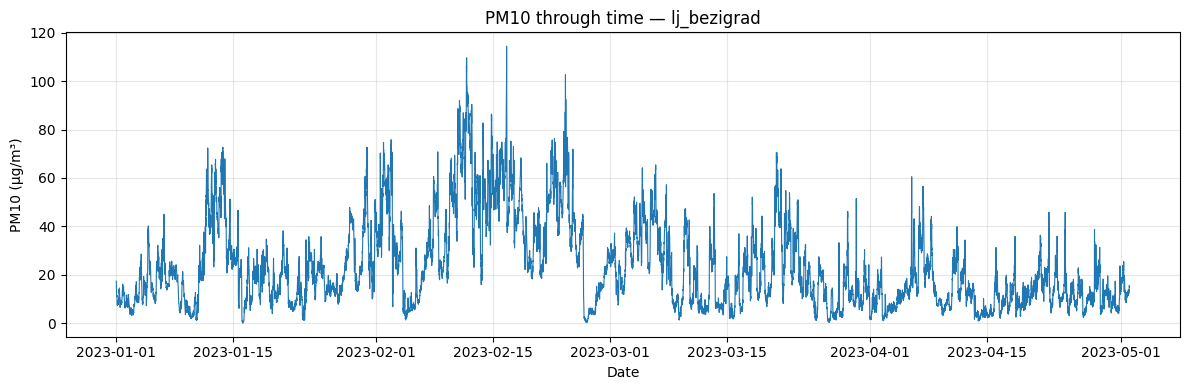

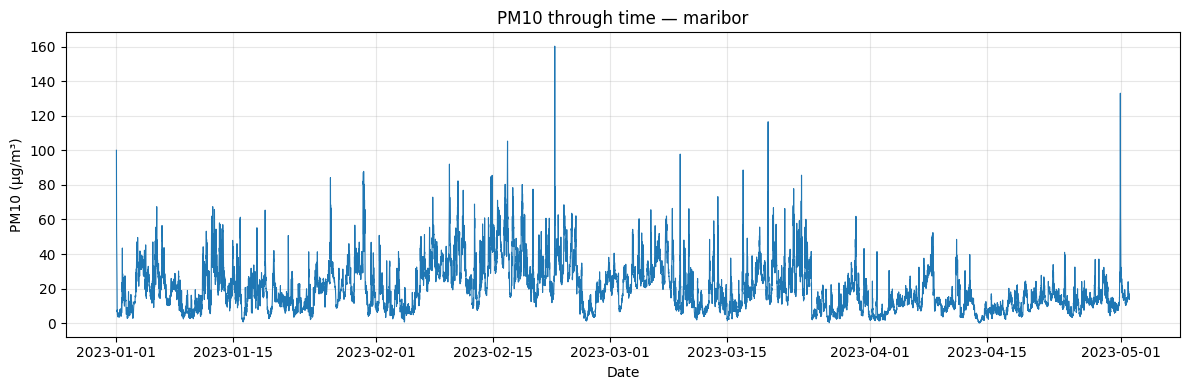

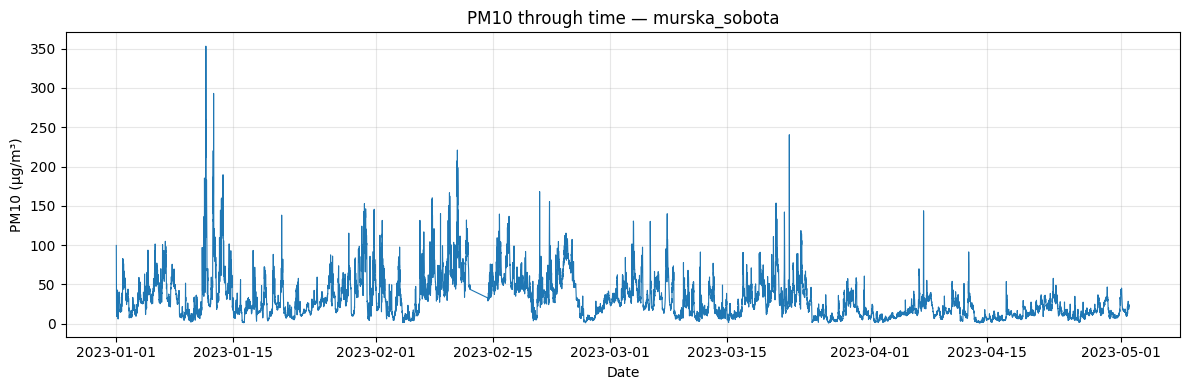

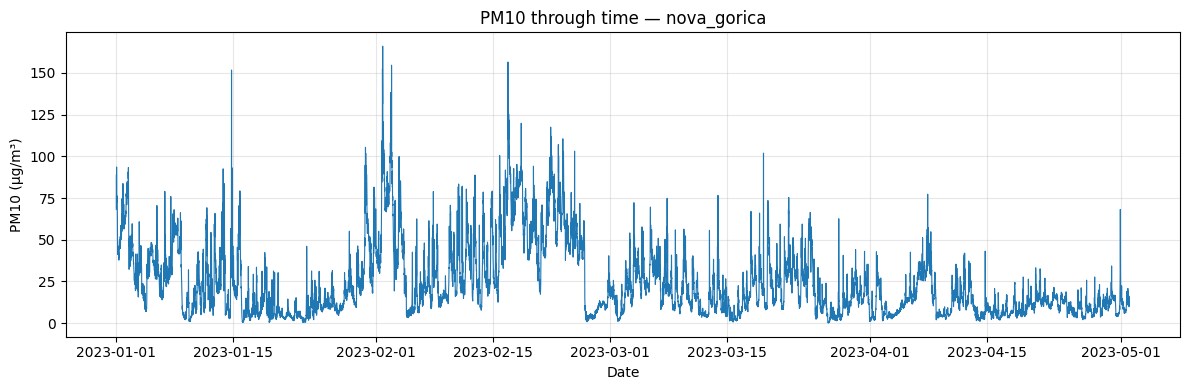

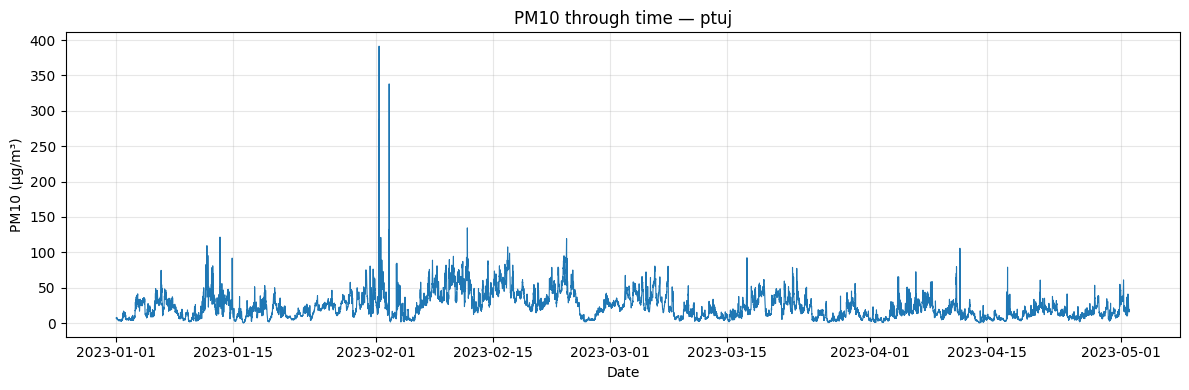

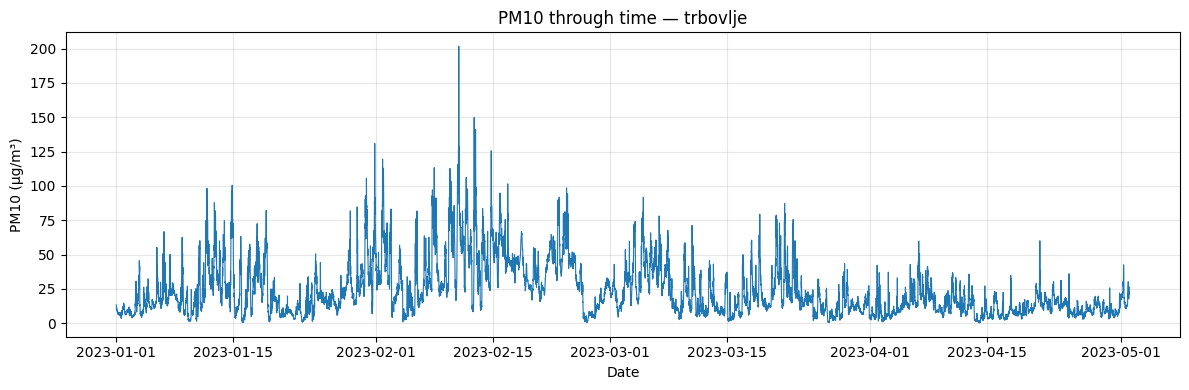

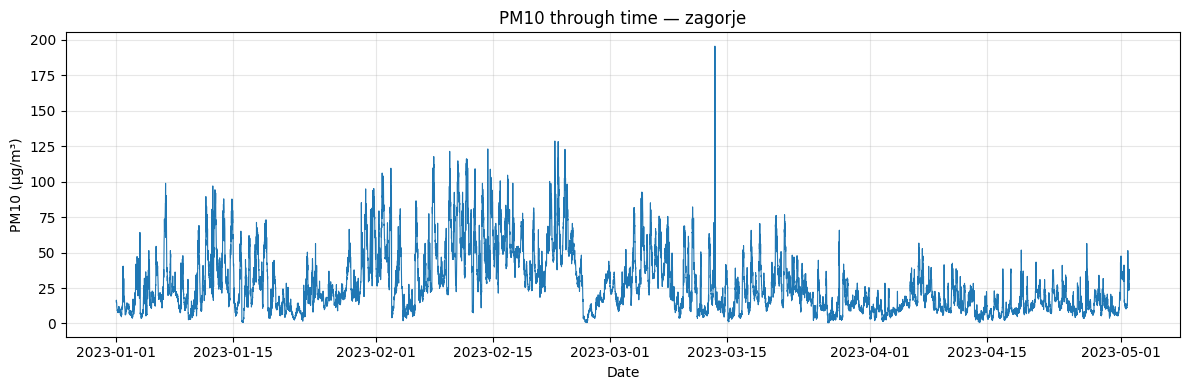

In [248]:
import matplotlib.pyplot as plt

cities = df_merged["mesto"].unique()

for city in cities:
    subset = df_merged[df_merged["mesto"] == city]

    plt.figure(figsize=(12, 4))
    plt.plot(subset["datum_zajema"], subset["pm10 [µg/m³]"], linewidth=0.8)
    plt.title(f"PM10 through time — {city}")
    plt.xlabel("Date")
    plt.ylabel("PM10 (µg/m³)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [255]:
raise SystemExit

SystemExit: 

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


2. Forecasting

In [259]:
df_long_2.columns

Index(['datum_zajema', 'mesto', 'smer vetra [°]', 'pm10 [µg/m³]',
       'padavine [mm]', 'temperatura [°C]', 'veter [m/s]'],
      dtype='object')

In [260]:
import numpy as np

df_long_2["wind_sin"] = np.sin(np.deg2rad(df_long_2["smer vetra [°]"]))
df_long_2["wind_cos"] = np.cos(np.deg2rad(df_long_2["smer vetra [°]"]))


In [261]:
df_long_2 = df_long_2.sort_values("datum_zajema")
df_long_2 = df_long_2.set_index("datum_zajema")


In [268]:
exog_cols = [
    "wind_sin",
    "wind_cos",
    "veter [m/s]",
    "temperatura [°C]",
    "padavine [mm]",
]


In [270]:
def impute_exog(df, exog_cols):
    df = df.copy()

    # Wind direction components
    for col in ["wind_sin", "wind_cos"]:
        if col in df:
            df[col] = df[col].ffill().bfill()

    # Wind speed
    if "veter [m/s]" in df:
        df["veter [m/s]"] = df["veter [m/s]"].ffill()

    # Temperature
    if "temperatura [°C]" in df:
        df["temperatura [°C]"] = df["temperatura [°C]"].interpolate()

    # Precipitation → assume no rain if missing
    if "padavine [mm]" in df:
        df["padavine [mm]"] = df["padavine [mm]"].fillna(0.0)

    # Final safety net
    df[exog_cols] = df[exog_cols].fillna(method="ffill").fillna(method="bfill")

    return df


In [282]:
df_imputed = impute_exog(df_long_2, exog_cols)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18788\979737720.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[exog_cols] = df[exog_cols].fillna(method="ffill").fillna(method="bfill")


In [310]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def forecast_day_all_cities(df, date, target="pm10 [µg/m³]"):
    """
    Forecast pm10 for a given day for every city, returning predicted and actual values.
    
    Parameters
    ----------
    df : DataFrame with 'mesto' and datetime index
    date : str or pd.Timestamp (YYYY-MM-DD)
    target : column to forecast
    
    Returns
    -------
    DataFrame with columns: datum_zajema, mesto, pm10_pred, pm10_actual
    """
    date = pd.to_datetime(date)
    exog_cols = ["wind_sin", "wind_cos", "veter [m/s]", "temperatura [°C]", "padavine [mm]"]
    
    all_results = []

    for city in df['mesto'].unique():
        df_city = df[df['mesto'] == city]
        
        # Training data
        train = df_city.loc[df_city.index < date]
        if len(train) < 48:
            continue  # skip cities with not enough history
        
        X_train = train[exog_cols]
        y_train = train[target]
        y_train = y_train.asfreq("30min")  # explicitly set frequency

        # Future index for the day
        future_idx = pd.date_range(start=date, periods=48, freq="30min")

        # Exogenous variables for the forecast
        X_future = df_city[exog_cols].reindex(future_idx)
        if X_future.isna().any().any():
            continue  # skip if future exog data is missing

        # Fit SARIMAX model
        model = SARIMAX(
            y_train,
            exog=X_train,
            order=(2, 0, 2),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        res = model.fit(disp=False)

        # Forecast
        forecast = res.forecast(steps=48, exog=X_future)

        # Actual values (if available)
        y_actual = df_city[target].reindex(future_idx)

        # Combine results
        result = pd.DataFrame({
            "datum_zajema": future_idx,
            "mesto": city,
            "pm10_pred": forecast.values,
            "pm10_actual": y_actual.values
        })

        all_results.append(result)

    return pd.concat(all_results).reset_index(drop=True)


In [311]:
pred = forecast_day_all_cities(df_imputed, "2023-04-30")



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

In [306]:
import matplotlib.pyplot as plt

def plot_predictions(pred_df):
    """
    Plot actual vs predicted values for each city.
    
    Parameters
    ----------
    pred_df : DataFrame
        Must have columns 'datum_zajema', 'mesto', 'pm10_pred', 'pm10_actual'
    """
    cities = pred_df['mesto'].unique()
    
    for city in cities:
        df_city = pred_df[pred_df['mesto'] == city]
        
        plt.figure(figsize=(12,4))
        plt.plot(df_city['datum_zajema'], df_city['pm10_actual'], label='Actual', marker='o')
        plt.plot(df_city['datum_zajema'], df_city['pm10_pred'], label='Predicted', marker='x')
        plt.title(f'PM10 Forecast vs Actual - {city}')
        plt.xlabel('Datetime')
        plt.ylabel('PM10 [µg/m³]')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()


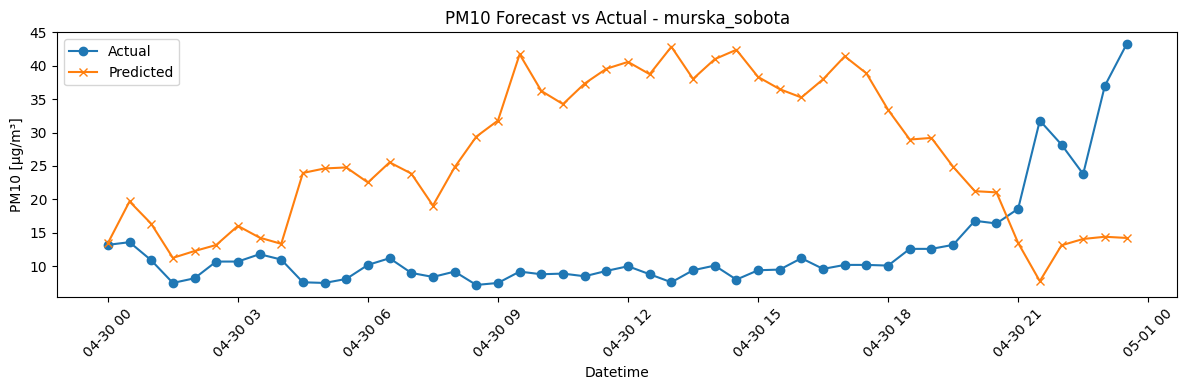

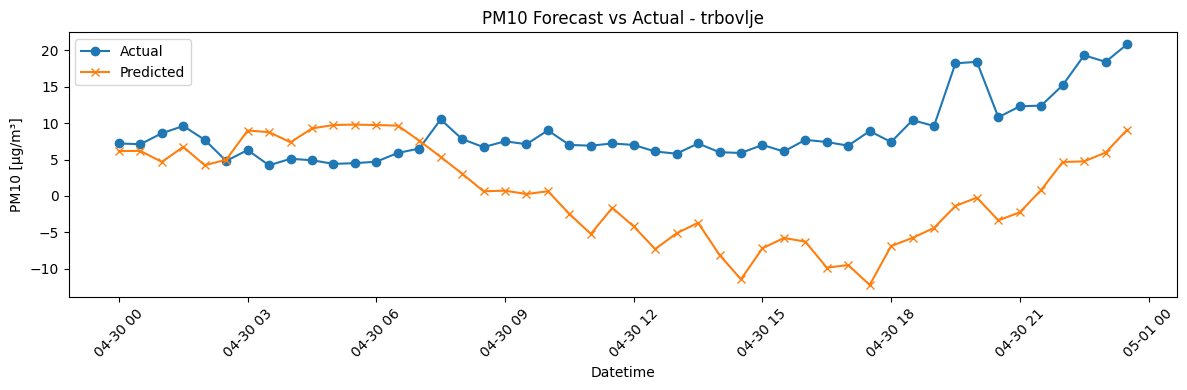

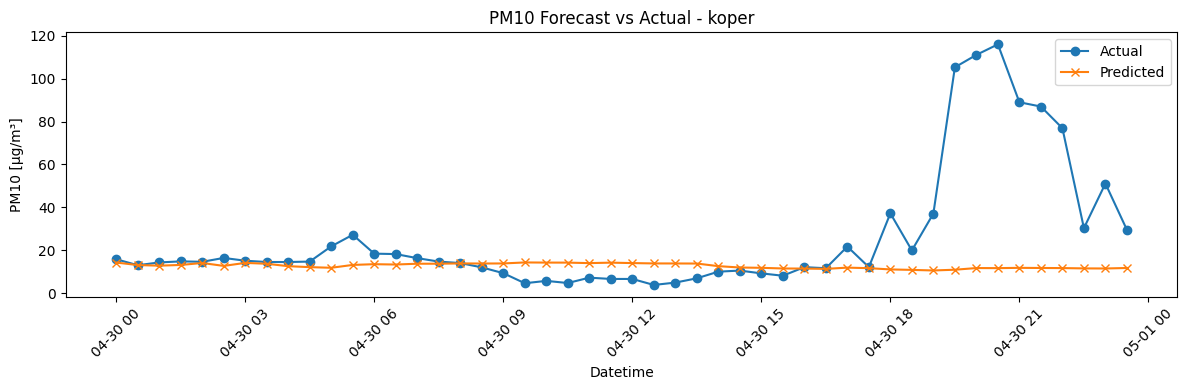

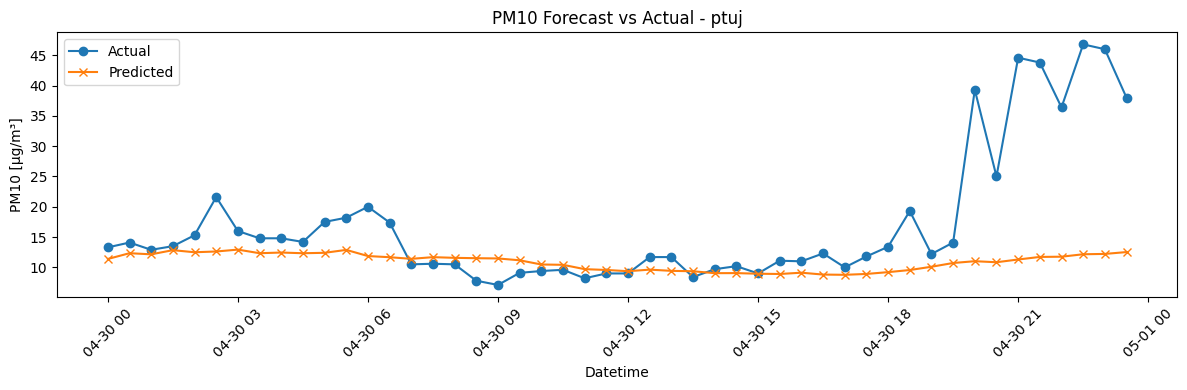

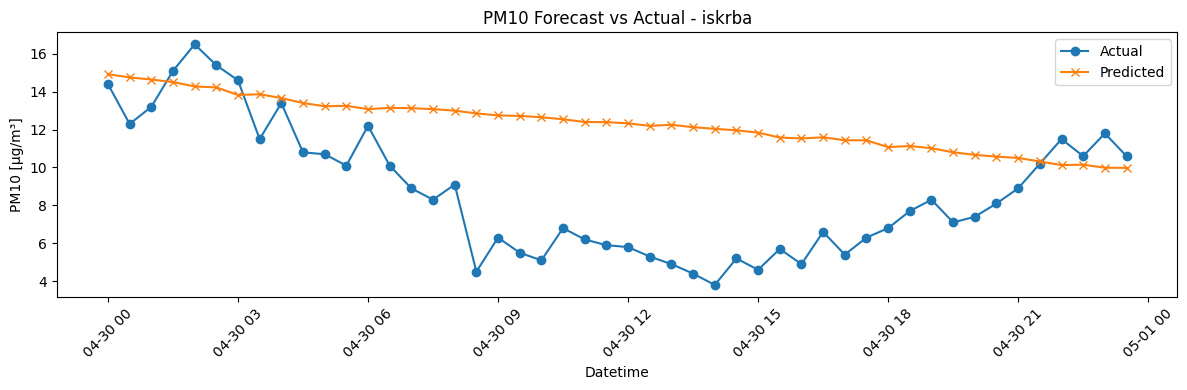

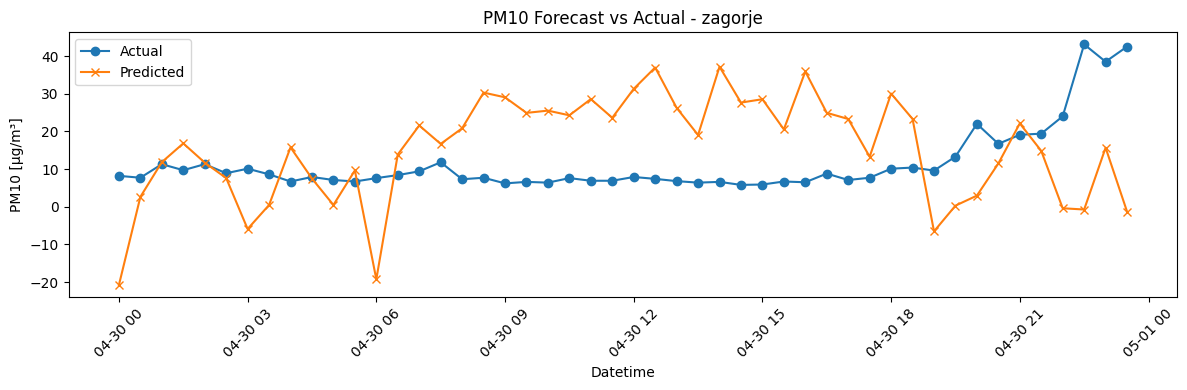

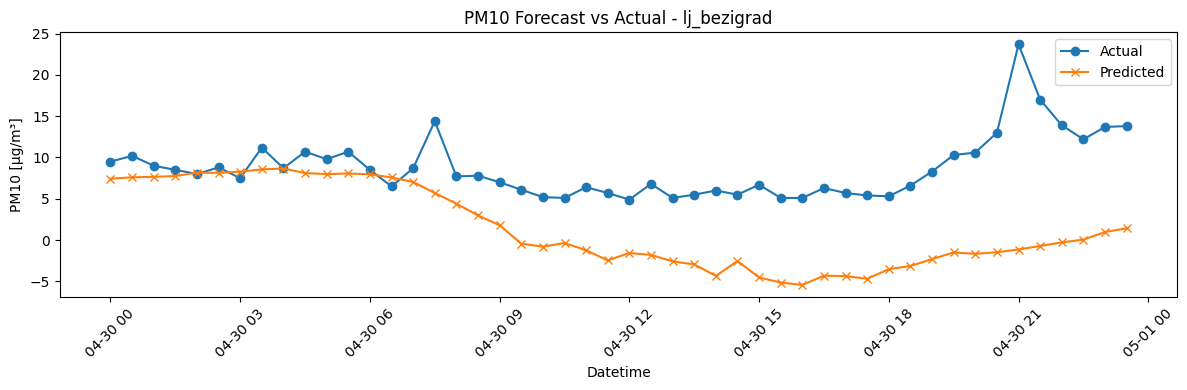

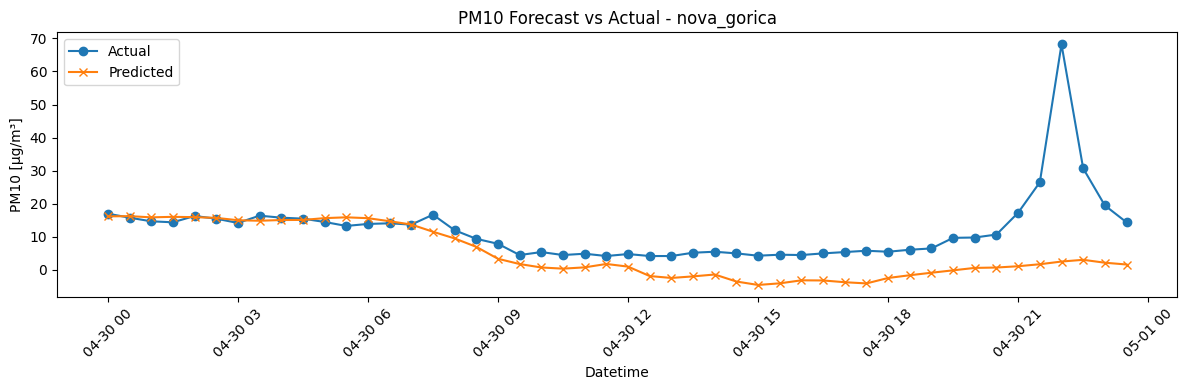

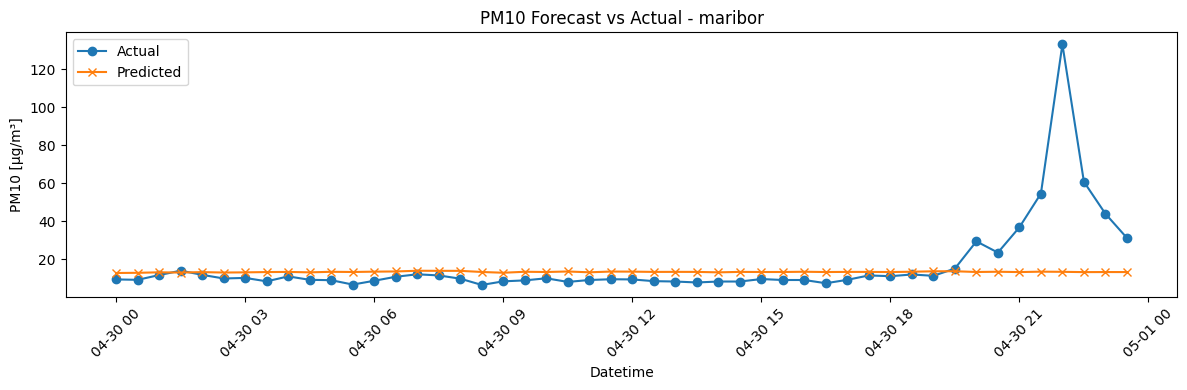

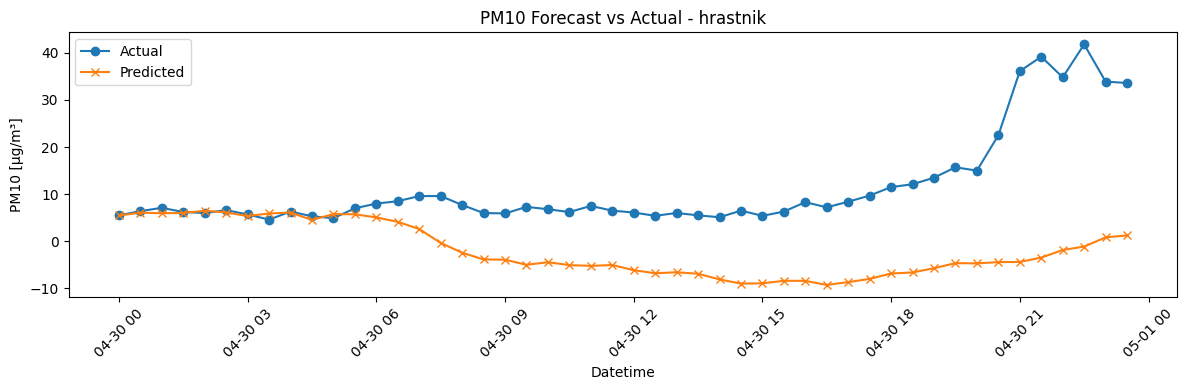

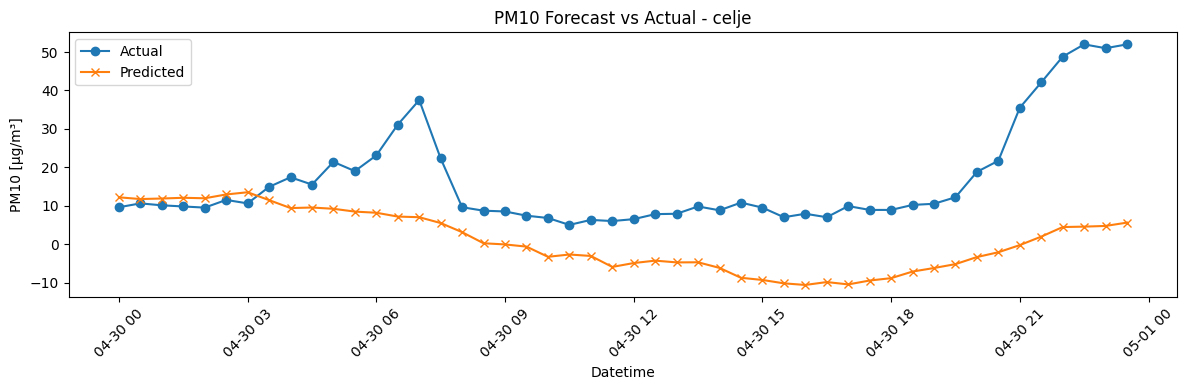

In [307]:
plot_predictions(pred)

3. Evaluating models

In [316]:
pred['error'] = pred['pm10_pred'] - pred['pm10_actual']
pred['abs_error'] = pred['error'].abs()

mae_overall = pred['abs_error'].mean()
print(f"Overall MAE: {mae_overall:.2f} µg/m³")


Overall MAE: 11.41 µg/m³


In [317]:
rmse_per_city = pred.groupby('mesto').apply(
    lambda x: ((x['pm10_pred'] - x['pm10_actual'])**2).mean()**0.5
)
print(rmse_per_city)


mesto
celje            20.417180
hrastnik         17.765691
iskrba            4.693890
koper            32.423272
lj_bezigrad       8.975637
maribor          20.930499
murska_sobota    21.171896
nova_gorica      12.702990
ptuj             12.267555
trbovlje         11.077536
zagorje          18.875207
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_18788\1184386268.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_per_city = pred.groupby('mesto').apply(
